# 2008 Flights Dataset Exploration
## by Oscar Evangelista

## Preliminary Wrangling

This project explores a dataset containing information for approximately 7 million flights flown in 2008 which for the purposes of performing exploratory and explanatory analyses was narrowed down to flights during the busiest month of the year.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
flights = pd.read_csv('2008.csv')

## Dataset Overview

Let's get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [3]:
# high-level overview of data shape and composition
print(flights.shape)
print(flights.dtypes)
print(flights.sample(5))

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object
         Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
6520483  2008     12          20          6    730.0  

In [4]:
print(flights.describe())

            Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  7009728.0  7.009728e+06  7.009728e+06  7.009728e+06  6.873482e+06   
mean      2008.0  6.375130e+00  1.572801e+01  3.924182e+00  1.333830e+03   
std          0.0  3.406737e+00  8.797068e+00  1.988259e+00  4.780689e+02   
min       2008.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%       2008.0  3.000000e+00  8.000000e+00  2.000000e+00  9.280000e+02   
50%       2008.0  6.000000e+00  1.600000e+01  4.000000e+00  1.325000e+03   
75%       2008.0  9.000000e+00  2.300000e+01  6.000000e+00  1.728000e+03   
max       2008.0  1.200000e+01  3.100000e+01  7.000000e+00  2.400000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  7.009728e+06  6.858079e+06  7.009728e+06  7.009728e+06   
mean   1.326086e+03  1.481258e+03  1.494801e+03  2.224200e+03   
std    4.642509e+02  5.052251e+02  4.826728e+02  1.961716e+03   
min    0.000000e+00  1.000000e+00  0.000000e+00  1.0000

## Dataset Tidying

In [5]:
# rename DayofMonth, create new column, combine Day, Month and Year columns, and use to_datetime method 
# to convert to Date time object
flights.rename(columns={'DayofMonth': 'Day'}, inplace=True) 
flights['flight_date'] = pd.to_datetime(flights.Year*10000+flights.Month*100+flights.Day,format='%Y%m%d')
# set index to new column
flights = flights.set_index('flight_date')
# eliminate columns not needed in analyses
flights.drop(['Year','Month','Day', 'DayOfWeek','FlightNum','TailNum','ActualElapsedTime','CRSElapsedTime',\
              'AirTime','TaxiIn', 'TaxiOut'],axis = 1, inplace = True)

In [6]:
print(flights.shape)
print(flights.sample(5))

(7009728, 18)
             DepTime  CRSDepTime  ArrTime  CRSArrTime UniqueCarrier  ArrDelay  \
flight_date                                                                     
2008-05-22    2210.0        2041     29.0        2312            UA      77.0   
2008-01-13    1803.0        1810   2005.0        2005            UA       0.0   
2008-12-06    1739.0        1743   1906.0        1905            DL       1.0   
2008-12-20    1644.0        1635   1802.0        1755            MQ       7.0   
2008-12-13    1506.0        1515   2006.0        2040            AA     -34.0   

             DepDelay Origin Dest  Distance  Cancelled CancellationCode  \
flight_date                                                               
2008-05-22       89.0    ORD  SFO      1846          0              NaN   
2008-01-13       -7.0    MSY  DEN      1062          0              NaN   
2008-12-06       -4.0    ATL  RDU       356          0              NaN   
2008-12-20        9.0    CRP  DFW       354

### Status of Flights in 2008

Determine the number of total weekly flights every month during 2008

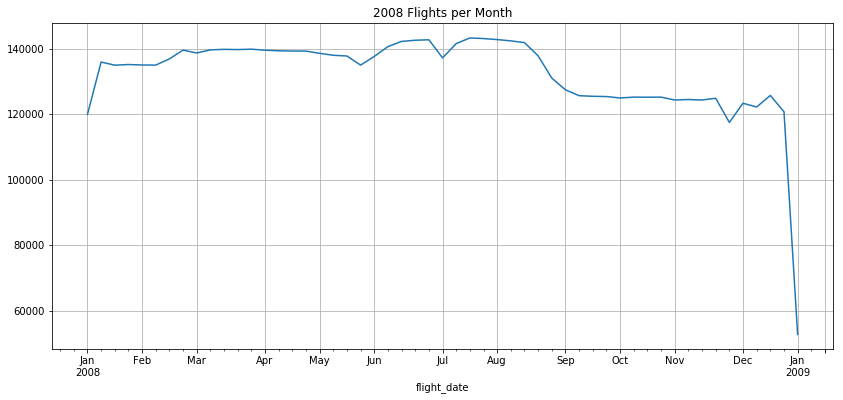

In [7]:
fc = flights.resample('W').size()
fc.plot(figsize=(14,6), title='2008 Flights per Month', grid=True);

> Contrary to my expectation that the month of December, being the holiday season, was the busiest month, it looks like the months of June and July, being the summer months, were the busiest months. There was no data available for January 2009 which explains the steep drop of the line chart at the end

Due to the volume of data, I decided to narrow the data to flights flown in July, which is the busiest month of the year.

In [8]:
flights = flights.loc['2008-7-1':'2008-8-1'].sort_index()

print(flights.shape)
print(flights.sample(5))

(648940, 18)
             DepTime  CRSDepTime  ArrTime  CRSArrTime UniqueCarrier  ArrDelay  \
flight_date                                                                     
2008-07-12    1210.0        1140   1326.0        1248            9E      38.0   
2008-07-20     959.0        1008   1241.0        1245            OO      -4.0   
2008-07-05     604.0         615    703.0         714            AS     -11.0   
2008-07-03    1221.0        1220   1523.0        1530            WN      -7.0   
2008-07-13    1959.0        1915   2300.0        2226            DL      34.0   

             DepDelay Origin Dest  Distance  Cancelled CancellationCode  \
flight_date                                                               
2008-07-12       30.0    DAY  DTW       166          0              NaN   
2008-07-20       -9.0    DEN  BIS       517          0              NaN   
2008-07-05      -11.0    JNU  KTN       234          0              NaN   
2008-07-03        1.0    ABQ  HOU       759 

### What is the structure of your dataset?

> There are 7,009,728 flights in the dataset with 29 attributes. Most variables are numeric in nature. I decided to narrow my dataset to the month of July and eliminate other attributes not needed for my analyses. This resulted to a revised dataset with 627,931 flights with 18 attributes

### What are the main feature(s) of interest in your dataset?

> As a consumer, I am interested about what are the day-today trends of air travel delays? which airlines are doing better at getting me at my destination on time?, when is the busiest month to fly?, and which airports are the worst to fly out from?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I assmue that the number of flights flown by airline and which airports they fly out from would affect if they experience flight delays.

Determine daily flights during the month of July

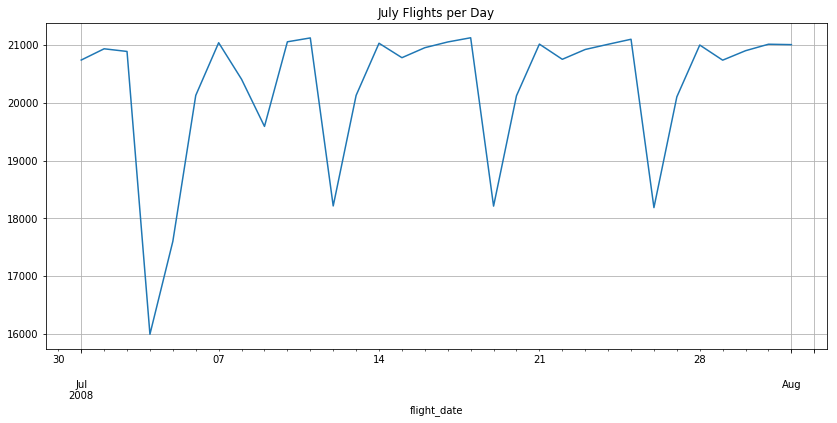

In [9]:
fj = flights.resample('D').size()
fj.plot(figsize=(14,6), title='July Flights per Day', grid=True);

> There was a steep drop of the number of flights on the **4th, 13th, 19th and 26th of July**

Determine which airline had the most flights.

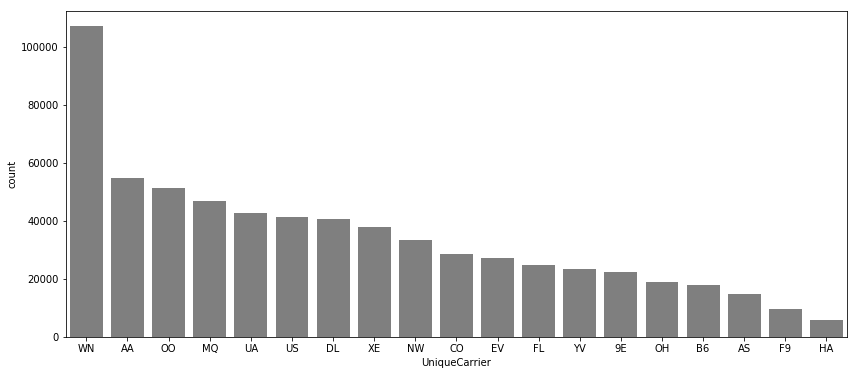

In [10]:
plt.figure(figsize = [14,6])
base_color = sb.color_palette()[7]
carrier_order = flights['UniqueCarrier'].value_counts().index
sb.countplot(data = flights, x='UniqueCarrier', color=base_color, order=carrier_order);

> **Southwest** had the most number of flights

### Flight Delays

Let's calculate the number of diverted, controlled, delayed, and online flights. Flights are considered delayed whenever they arrive 5 minutes or more later than scheduled.

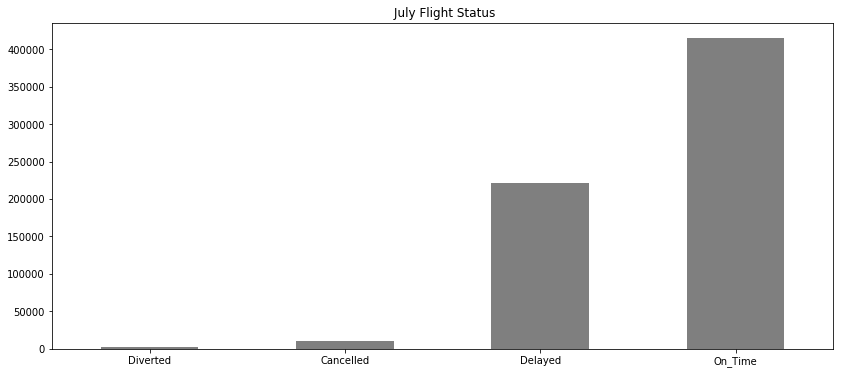

In [11]:
flights['Delayed'] = flights['ArrDelay'].ge(5).astype(int)
cols = ['Diverted', 'Cancelled', 'Delayed']
flights['On_Time'] = 1 - flights[cols].any(axis=1)
cols.append('On_Time')
status = flights[cols].sum()

base_color = sb.color_palette()[7]
plt.figure(figsize = [14,6])
status.plot(kind='bar', rot=0, color=base_color, title=' July Flight Status');

> Approximately half of the flights were delayed during the month.

Several columns in the dataset indicate the reasons for the arrival delays. What were the common reasons?

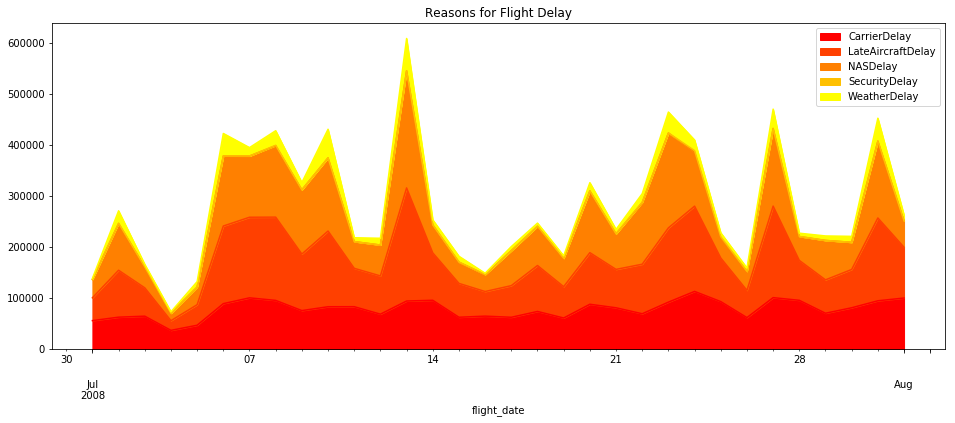

In [12]:
delays_list = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
flight_delays_by_day = flights.pivot_table(index='flight_date',values=delays_list,aggfunc='sum')

flight_delays_by_day.plot(kind='area',figsize=[16,6],stacked=True,colormap='autumn', title='Reasons for Flight Delay');

> The most common reasons for the arrival delays include (1) **Carrier Delay** which is due to circumstances within the airlines control, such as maintenance or crew problems, aircraft cleaning, baggage loading, fueling etc; (2) **Late Aircraft Delay**, which is due to a previous flight with the same aircraft arriving late, causing the present flight to depart late; and (3) **NAS Delay** which is attributable to the National Aviation System that refer to a broad set of conditions, such as  non-extreme weather conditions, airport operation, heavy traffic volume and air traffic control

Determine which flight had the longest delays

In [13]:
flights.sort_values(by='ArrDelay', ascending=False)[:10]

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed,On_Time
flight_date,,,,,,,,,,,,,,,,,,,,
2008-07-16,820.0,702,1325.0,1215,NW,1510.0,1518.0,SEA,MSP,1399,0,NaN,0,1510.0,0.0,0.0,0.0,0.0,1,0
2008-07-29,657.0,840,837.0,1020,AA,1337.0,1337.0,TPA,ORD,1012,0,NaN,0,0.0,0.0,1337.0,0.0,0.0,1,0
2008-07-30,1241.0,1445,2110.0,2305,AA,1325.0,1316.0,HNL,LAX,2556,0,NaN,0,0.0,0.0,9.0,0.0,1316.0,1,0
2008-07-30,844.0,1145,1148.0,1445,AA,1263.0,1259.0,DFW,HNL,3784,0,NaN,0,1263.0,0.0,0.0,0.0,0.0,1,0
2008-07-20,236.0,630,415.0,840,FL,1175.0,1206.0,PHL,ATL,665,0,NaN,0,1175.0,0.0,0.0,0.0,0.0,1,0
2008-07-06,925.0,1400,1138.0,1620,NW,1158.0,1165.0,TPA,MSP,1307,0,NaN,0,621.0,537.0,0.0,0.0,0.0,1,0
2008-07-02,1412.0,1925,1512.0,2009,9E,1143.0,1127.0,FNT,DTW,56,0,NaN,0,1127.0,0.0,16.0,0.0,0.0,1,0
2008-07-04,736.0,1250,1600.0,2110,AA,1130.0,1126.0,HNL,LAX,2556,0,NaN,0,1126.0,0.0,4.0,0.0,0.0,1,0
2008-07-30,1204.0,1805,1411.0,2000,AA,1091.0,1079.0,PBI,DFW,1103,0,NaN,0,751.0,0.0,12.0,0.0,328.0,1,0


> **Northwest Airlines** had the longest delay of 1510 minutes

Determine which airlines have the most delays.

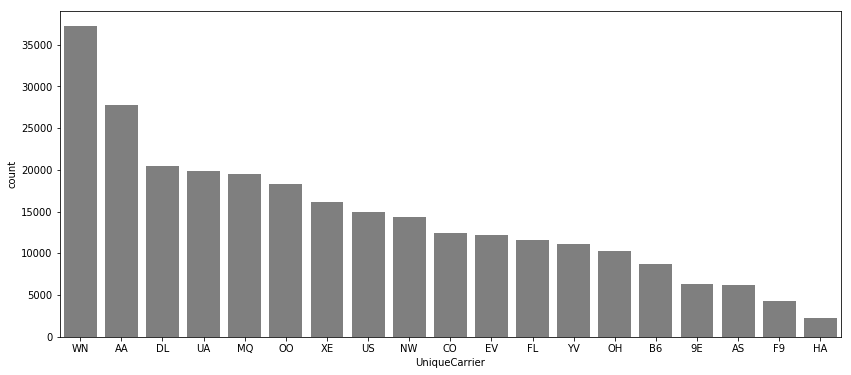

In [14]:
flights['delayed'] = flights['ArrDelay'].apply(lambda x: x>0)
delayed_flights = flights[flights['delayed'] == True]
delayed_flights['UniqueCarrier'].value_counts()
delayed_flights_order = delayed_flights['UniqueCarrier'].value_counts().index

plt.figure(figsize = [14,6])
base_color = sb.color_palette()[7]
sb.countplot(data = delayed_flights, x='UniqueCarrier', color=base_color, order=delayed_flights_order);

> **Southwest** has the most number of delayed flights with **American Airlines** having the second most number of delayed flights

Plot the  distribution of Southwest flight delays as a histogram

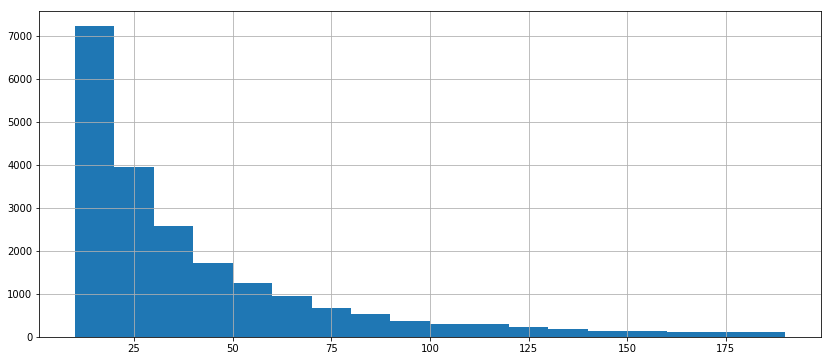

In [15]:
bins = np.arange(10,200, 10)
wn_airline = flights[flights['UniqueCarrier'] == 'WN']
wn_airline['ArrDelay'].hist(bins=bins, figsize=[14,6]);

> The vast majority of Southwest Airlines flights were not more than **30 minutes late**. Though the airline has many delayed flights, the majority of them aren't late enough.

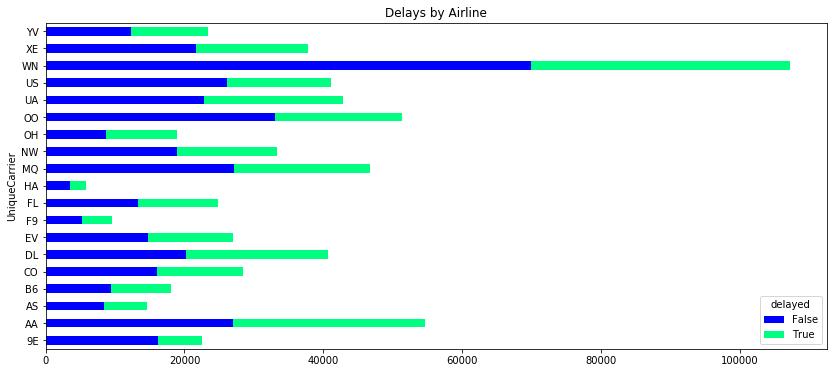

In [16]:
group_by_carrier = flights.groupby(['UniqueCarrier','delayed']).size()
count_delays_by_carrier = group_by_carrier.unstack()
count_delays_by_carrier.plot(kind='barh', stacked=True, figsize=[14,6], colormap='winter', title='Delays by Airline');

> Even though Southwest Airlines had the most delayed flights, it appears that in terms of the total number of flights its proportion of delayed flights is on par or better than some of the airlines. It has the most number of delayed flights in part because it has the most number of flights 

Look at the **20 highest volume airports by origin**

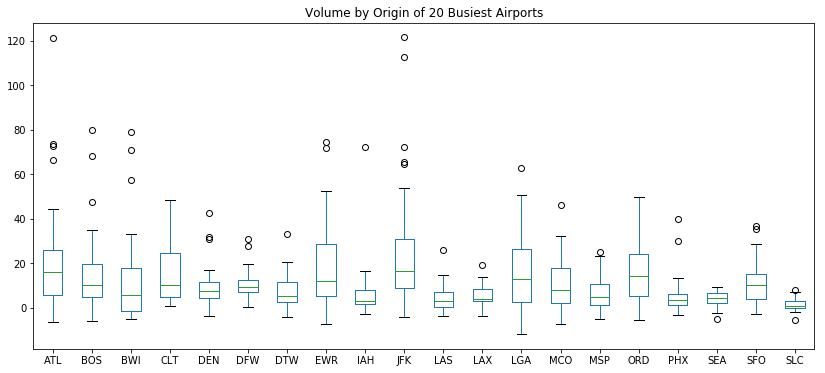

In [17]:
hi_vol = flights['Origin'].value_counts()[:20]
hi_vol_names = hi_vol.index
hi_vol_airports = flights[flights['Origin'].isin(hi_vol_names)]
hi_vol_airports_pivots = hi_vol_airports.pivot_table(index='flight_date', columns='Origin',values='ArrDelay')

hi_vol_airports_pivots.plot(kind='box', figsize=[14,6], title='Volume by Origin of 20 Busiest Airports');

> The 20 busiest airports have flights that come mostly from **Hartsfield-Jackson Atlanta International Airport**, **John F Kennedy Airport** and **Chicago O'Hare International Airport**

Flight Delays by carriers at 20 of the highest volume airports

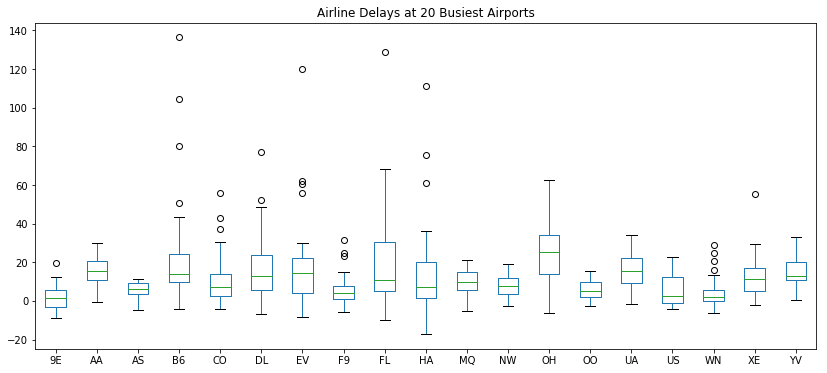

In [18]:
hi_vol_airports_pivots = hi_vol_airports.pivot_table(index='flight_date', columns='UniqueCarrier',values='ArrDelay')
hi_vol_airports_pivots.plot(kind='box', figsize=[14,6], title='Airline Delays at 20 Busiest Airports');

> **PSA Airlines** had the most flights delays at the 20 busiest airports

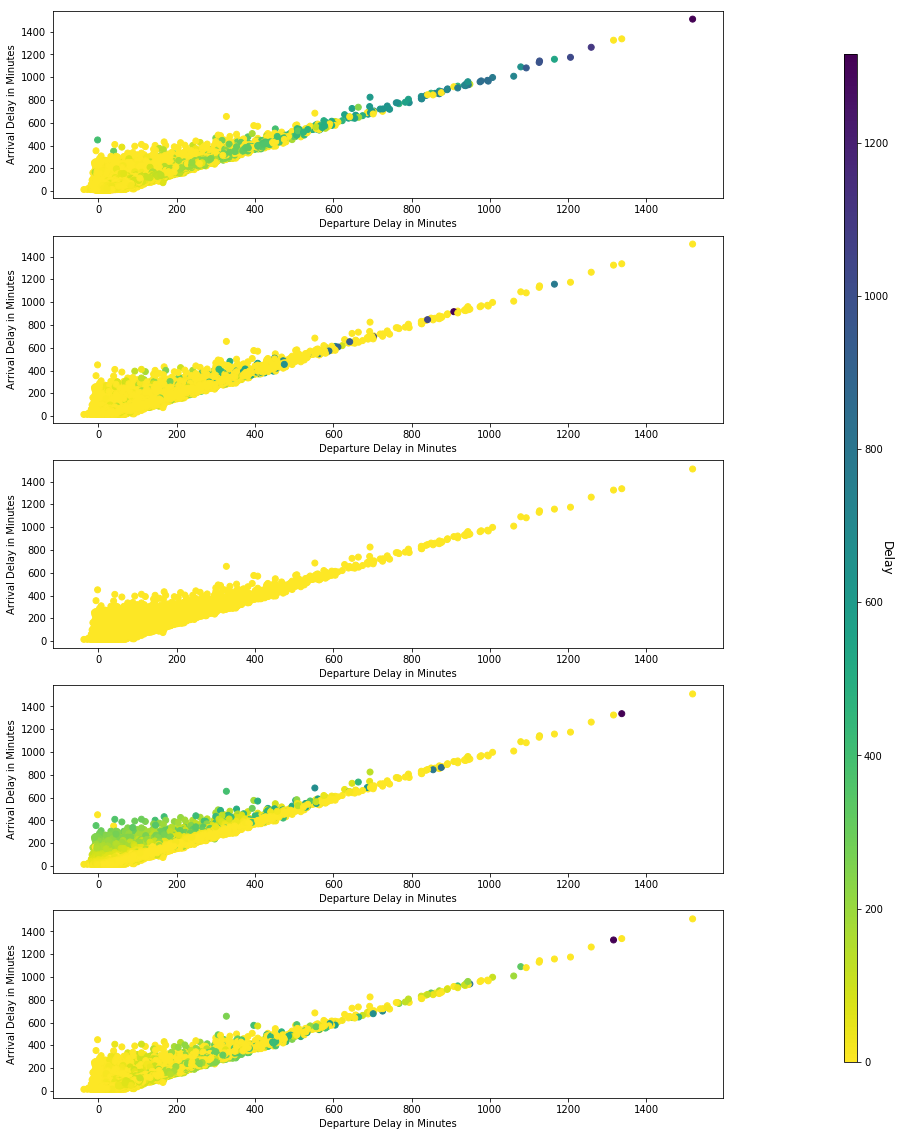

In [19]:
# histograms for the remaining numerical variables
fig, ax = plt.subplots(nrows = 5, figsize = [12, 20])

variables = ['CarrierDelay', 'WeatherDelay', 'SecurityDelay', 'NASDelay', 'LateAircraftDelay']
for i in range(len(variables)):
    var = variables[i]
    splot = ax[i].scatter(data = flights, x = 'DepDelay', y = 'ArrDelay' , c = var, cmap = 'viridis_r')
    ax[i].set_xlabel('Departure Delay in Minutes')
    ax[i].set_ylabel('Arrival Delay in Minutes')

# generate the axes for the color bar
cbar_ax = plt.axes([1.04, 0.15, 0.015, 0.7])

# attach the color bar to the created color bar
plt.colorbar(splot, cax=cbar_ax)
cbar_ax.set_ylabel('Delay', rotation=270, fontsize=12);

plt.show()

Find the 10 airports that have the **longest average distance for inbound flights** and have a **minimum of 100 total flights**

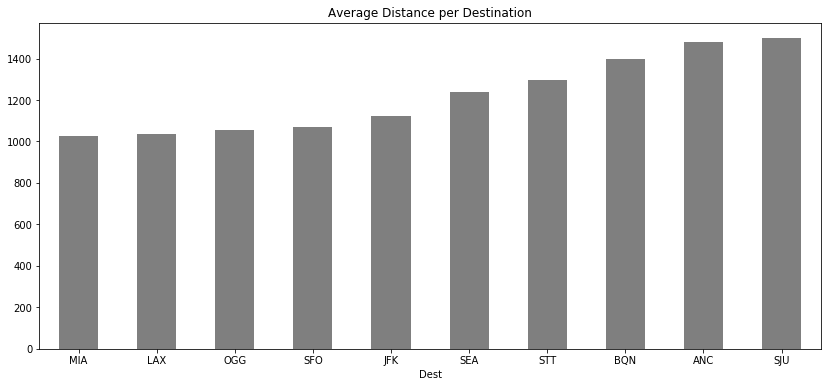

In [20]:
flights.groupby('Dest')['Distance'].agg(['mean', 'count']).query('count > 100').sort_values('mean').tail(10) \
       .plot(kind='bar', y='mean', rot=0, legend=False, figsize=[14,6], color=base_color, title='Average Distance per Destination');

> **Ted Stevens Anchorage International Airport (ANC)** in Alaska, **Luis Muñoz Marín International Airport (SJU)** in San Juan, Puerto Rico and **Aguadilla Borinquen Airport (BQN)** in Puerto Rico are the three airports that have a minimum of 100 flights which have the longest inbound average distance.

> A linear relationship and positive correlation exist between distance and airtime